# Sistem Rekomendasi Wisata di Indonesia

- **Nama:** Baiq Ega Aulia
- **Email:** baiqusbypkp@gmail.com
- **ID Dicoding:** Baiq Ega Aulia


# Project Overview

Perkembangan teknologi membawa perubahan yang pesat, sehingga memungkinkan akses informasi menjadi lebih mudah. Salah satu sektor yang mengalami dampak dari perkembangan ini adalah pariwisata. Indonesia memiliki potensi wisata yang sangat luas dengan berbagai destinasi menarik yang tersedia. Namun, banyaknya pilihan sering kali membuat wisatawan kesulitan menentukan tujuan yang paling sesuai untuk dikunjungi. Oleh karena itu, diperlukan sistem rekomendasi yang dapat membantu wisatawan menemukan destinasi yang selaras dengan preferensi mereka. Proyek ini bertujuan untuk mengembangkan sistem rekomendasi destinasi wisata di Indonesia dengan menggunakan dataset yang memuat informasi rinci mengenai berbagai tempat wisata di negara ini.

Referensi: [Jurnal rekomendasi wisata](https://ejournal.unama.ac.id/index.php/jurnalmsi/article/download/1262/1071).


# Business Understanding

## Problem Statement

Berdasarkan latar belakang yang dijelaskan di atas, rumusan masalah yang didapatkan sebagai berikut:
1. Bagaimana sistem dapat merekomendasikan destinasi wisata di Indonesia berdasarkan deskripsi, kategori, dan fasilitas yang tersedia di dataset?
2. Bagaimana sistem dapat menyederhanakan proses pencarian informasi dan memberikan rekomendasi yang relevan secara efisien?

## Goals
Berdasarkan rumusan masalah yang dijelaskan di atas, tujuan dari projek ini adalah sebagai berikut:
1. Membangun sistem rekomendasi yang efektif menggunakan informasi deskripsi, kategori, dan fasilitas destinasi.
2. Membangun sistem rekomendasi yang efisien dan efektif menggunakan rating destinasi wisata.

## Solution
Berdasarkan tujuan di atas, ada beberapa solusi yang bisa dilakukan, yaitu:
1. Menerapkan Content-Based Filtering untuk merekomendasikan destinasi yang serupa dengan destinasi yang sebelumnya disukai oleh pengguna, berdasarkan deskripsi dan fitur destinasi tersebut (misalnya, kategori, fasilitas).
2. Menerapkan Collaborative Filtering untuk merekomendasikan destinasi berdasarkan preferensi pengguna lain yang memiliki selera yang mirip. Dalam konteks ini, gunakan user-item interaction untuk memprediksi rating yang mungkin diberikan user ke suatu destinasi.

# Data Understanding

## Deskripsi Dataset
Dataset pada projek ini diambil dari kaggle, yaitu [Sistem Rekomendasi Wisata](https://www.kaggle.com/datasets/aprabowo/indonesia-tourism-destination?select=tourism_with_id.csv). Pada dataset ini berisi 4 *file* dengan nama `package_tourism`, `tourism_rating`, `tourism_with_id`, dan `user` dengan ekstensi `csv` `(*Comma Separated Values*)`,dengan masing-masing banyaknya data yaitu 100 data dan 7 variabel untuk `package_tourism(package)`, 10000 data dan 3 variabel untuk `tourism_rating(rating)`, 437 data dan 13 variabel untuk `tourism_with_id(location)`, serta 300 data dan 3 variabel untuk `user`.
Berikut adalah penjelasan variabel dari masing-masing dataset:
### package_tourism(package)
Berikut merupakan deskripsi variabel dari dataset `package_tourism(package)`:
- Package: ID unik untuk setiap paket wisata.
- City: Kota di mana tempat wisata berada.
- Place_Tourism1 : Destinasi wisata pertama yang termasuk dalam paket
- Place_Tourism2 : Destinasi wisata kedua yang termasuk dalam paket
- Place_Tourism3 : Destinasi wisata ketiga yang termasuk dalam paket
- Place_Tourism4 : Destinasi wisata keempat yang termasuk dalam paket
- Place_Tourism5 : Destinasi wisata kelima yang termasuk dalam paket
### tourism_rating(rating)
Berikut merupakan deskripsi variabel dari dataset `tourism_rating(rating)`:
- User_Id       : ID unik untuk setiap user.
- Place_Id      : ID unik untuk setiap tempat wisata.
- Place_Ratings : Rating untuk setiap tempat wisata dari user.
### tourism_with_id(location)
- Place_Id      : ID unik untuk setiap tempat wisata.
- Place_Name    : Nama tempat wisata.
- Description   : Deskripsi singkat mengenai tempat wisata.
- Category      : Kategori tempat wisata (misalnya, Budaya, Taman Hiburan, Cagar Alam).
- City          : Kota di mana tempat wisata berada.
- Price         : Harga tiket masuk ke tempat wisata (dalam rupiah).
- Rating        : Penilaian rata-rata dari pengunjung (skala 1-5).
- Time_Minutes  : Waktu yang diperlukan untuk mengunjungi tempat wisata (dalam menit).
- Coordinate    : Koordinat geografis tempat wisata.
- Lat           : Garis lintang lokasi tempat wisata.
- Long          : Garis bujur lokasi tempat wisata.
- Unnamed: 11   : Tidak diketahui.
- Unnamed: 12   : Tidak diketahui.
### user
- User_Id       : ID unik untuk setiap pengguna.
- Location      : Kota atau lokasi asal pengguna.
- Age           : Usia pengguna.

## Import Libraray

Pada tahap ini, dilakukan import seluruh library python yang diperlukan dalam pengembangan projek

In [61]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from pathlib import Path

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Data Loading

Pada tahap, dilakukan pengabilan dataset. Dataset yang digunakan adalah Dataset Sistem Rekomendasi Wisata

In [2]:
# definisi variabel untuk masing-masing dataset
package_df = pd.read_csv('package_tourism.csv')
rating_df = pd.read_csv('tourism_rating.csv')
location_df = pd.read_csv('tourism_with_id.csv')
user_df = pd.read_csv('user.csv')

print('Banyaknya data package: ', len(package_df))
print('Banyaknya data rating: ', len(rating_df))
print('Banyaknya data location: ', len(location_df))
print('Banyaknya data user: ', len(user_df))

Banyaknya data package:  100
Banyaknya data rating:  10000
Banyaknya data location:  437
Banyaknya data user:  300


Dataset destinasi wisata Indonesia terdiri dari empat sub-dataset, yaitu paket wisata, penilaian, lokasi, dan pengguna. Masing-masing sub-dataset memiliki jumlah data yang berbeda, yaitu 100 data untuk paket wisata, 10.000 data untuk penilaian, 437 data untuk lokasi, dan 300 data untuk pengguna.

## Exploratory Data Analysis

### Univariate EDA
Pada langkah ini, lakukan pengecekan banyaknya data dari masing-masing variabel serta beberapa nilai unik yang akan diidentifikasi.

#### Dataset package
Eksplorasi dataset package_tourism.csv yang berisi informasi paket wisata berdasarkan kota dan destinasi.

In [3]:
package_df.head()

,Package,City,Place_Tourism1,Place_Tourism2,Place_Tourism3,Place_Tourism4,Place_Tourism5
0,1,Jakarta,Pasar Tanah Abang,Taman Ayodya,Museum Tekstil,NaN,NaN
1,2,Jakarta,Pasar Tanah Abang,Pasar Taman Puring,Pasar Petak Sembilan,NaN,NaN
2,3,Jakarta,Perpustakaan Nasional,Monas,Masjid Istiqlal,NaN,NaN
3,4,Jakarta,Pulau Tidung,Pulau Bidadari,Pulau Pari,Pulau Pramuka,Pulau Pelangi
4,5,Jakarta,Museum Satria Mandala,Museum Wayang,Museum Bahari Jakarta,Museum Macan (Modern and Contemporary Art in N...,NaN


In [4]:
print('Banyak data: ', len(package_df['Package'].unique()))
print('Banyak Kota: ', package_df['City'].unique())

Banyak data:  100
Banyak Kota:  ['Jakarta' 'Yogyakarta' 'Bandung' 'Semarang' 'Surabaya']


In [5]:
package_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Package         100 non-null    int64 
 1   City            100 non-null    object
 2   Place_Tourism1  100 non-null    object
 3   Place_Tourism2  100 non-null    object
 4   Place_Tourism3  100 non-null    object
 5   Place_Tourism4  66 non-null     object
 6   Place_Tourism5  39 non-null     object
dtypes: int64(1), object(6)
memory usage: 5.6+ KB


            jumlah sampel  persentase
City                                 
Jakarta                20        20.0
Yogyakarta             20        20.0
Bandung                20        20.0
Semarang               20        20.0
Surabaya               20        20.0


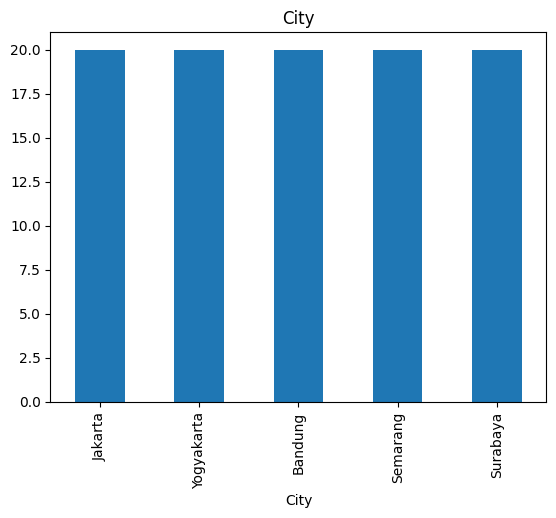

In [6]:
feature = 'City'
count = package_df[feature].value_counts()
percent = 100*package_df[feature].value_counts(normalize=True)

df_vis = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df_vis)
count.plot(kind='bar', title=feature);

Variabel dalam dataset **package**:

- **Package**: Nomor identifikasi unik untuk setiap paket wisata.  
- **City**: Kota tempat destinasi wisata berada.  
- **Place_Tourism1**: Destinasi wisata pertama dalam paket.  
- **Place_Tourism2**: Destinasi wisata kedua dalam paket.  
- **Place_Tourism3**: Destinasi wisata ketiga dalam paket.  
- **Place_Tourism4**: Destinasi wisata keempat dalam paket.  
- **Place_Tourism5**: Destinasi wisata kelima dalam paket.  

Dataset **package** terdiri dari 100 entri dengan 7 variabel, di mana variabel **Place_tourism4** dan **Place_tourism5** mengandung nilai **null**. Selain itu, dataset ini mencakup 5 nilai unik pada variabel **City**, yaitu **Jakarta, Yogyakarta, Bandung, Semarang, dan Surabaya**, dengan masing-masing kota memiliki **20 paket wisata**.



#### Dataset Rating
Eksplorasi dataset tourism_rating.csv yang berisi informasi rating dari user terhadap tempat wisata tertentu.

In [7]:
rating_df.head()

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4


In [8]:
print('Banyak user: ', len(rating_df['User_Id'].unique()))
print('Banyak rating: ', (rating_df['Place_Ratings'].unique()))

Banyak user:  300
Banyak rating:  [3 2 5 4 1]


In [9]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10000 non-null  int64
 1   Place_Id       10000 non-null  int64
 2   Place_Ratings  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB


               jumlah sampel  persentase
Place_Ratings                           
4                       2106        21.1
3                       2096        21.0
2                       2071        20.7
5                       2021        20.2
1                       1706        17.1


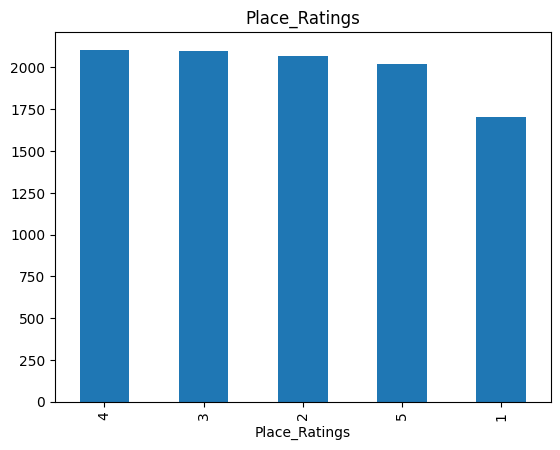

In [10]:
feature = 'Place_Ratings'
count = rating_df[feature].value_counts()
percent = 100*rating_df[feature].value_counts(normalize=True)

df_vis = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df_vis)
count.plot(kind='bar', title=feature);

Variabel dalam dataset **rating**:

- **User_Id**: Nomor identifikasi unik yang diberikan kepada setiap pengguna.  
- **Place_Id**: Nomor identifikasi unik yang digunakan untuk setiap destinasi wisata.  
- **Place_Ratings**: Penilaian yang diberikan oleh pengguna untuk setiap tempat wisata.  

Dataset **rating** terdiri dari **10.000 data** dengan **3 variabel**. Dalam dataset ini, terdapat **300 nilai unik** pada variabel **User_Id** serta **5 nilai unik** pada variabel **Place_Ratings**, yaitu **1, 2, 3, 4, dan 5**. Dari kelima nilai rating tersebut, rating **4** memiliki jumlah data tertinggi dibandingkan yang lain, meskipun selisihnya relatif kecil.

#### Dataset Location
Eksplorasi dataset tourism_with_id.csv yang memuat informasi detil tempat wisata, termasuk deskripsi dan kategori.

In [11]:
location_df.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5


In [12]:
print('Banyak tempat wisata: ', len(location_df['Place_Name'].unique()))
print('Tipe Kategori: ', location_df['Category'].unique())

Banyak tempat wisata:  437
Tipe Kategori:  ['Budaya' 'Taman Hiburan' 'Cagar Alam' 'Bahari' 'Pusat Perbelanjaan'
 'Tempat Ibadah']


In [13]:
location_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Description   437 non-null    object 
 3   Category      437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    float64
 7   Time_Minutes  205 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-null    float64
 10  Long          437 non-null    float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   437 non-null    int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 44.5+ KB


                    jumlah sampel  persentase
Category                                     
Taman Hiburan                 135        30.9
Budaya                        117        26.8
Cagar Alam                    106        24.3
Bahari                         47        10.8
Tempat Ibadah                  17         3.9
Pusat Perbelanjaan             15         3.4


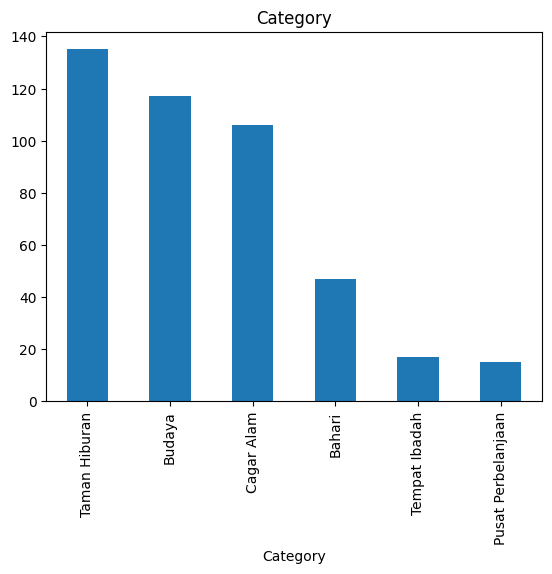

In [14]:
feature = 'Category'
count = location_df[feature].value_counts()
percent = 100*location_df[feature].value_counts(normalize=True)

df_vis = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df_vis)
count.plot(kind='bar', title=feature);

Variabel dalam dataset **location**:

- **Place_Id**: Identifikasi unik untuk setiap destinasi wisata.  
- **Place_Name**: Nama dari tempat wisata tersebut.  
- **Description**: Ringkasan singkat yang menjelaskan tempat wisata.  
- **Category**: Jenis kategori destinasi wisata (contoh: Budaya, Taman Hiburan, Cagar Alam).  
- **City**: Kota tempat wisata berada.  
- **Price**: Biaya tiket masuk ke destinasi wisata (dalam rupiah).  
- **Rating**: Rata-rata penilaian dari pengunjung, dengan skala 1 hingga 5.  
- **Time_Minutes**: Perkiraan durasi kunjungan ke tempat wisata (dalam menit).  
- **Coordinate**: Koordinat geografis lokasi wisata.  
- **Lat**: Garis lintang dari lokasi wisata.  
- **Long**: Garis bujur dari lokasi wisata.  
- **Unnamed: 11**: Informasi tidak diketahui.  
- **Unnamed: 12**: Informasi tidak diketahui.  

Dataset **location** memiliki **437 data** dan terdiri dari **13 variabel**, mencerminkan jumlah unik destinasi wisata yang dicakup. Terdapat beberapa nilai **null** pada kolom **Time_Minutes** dan **Unnamed: 11**. Selain itu, dalam variabel **Category** terdapat **6 nilai unik**, yaitu **Budaya, Taman Hiburan, Cagar Alam, Bahari, Pusat Perbelanjaan, dan Tempat Ibadah**. Dari kategori tersebut, **Taman Hiburan** memiliki jumlah data tertinggi, yaitu **135 entri**.


#### Dataset User
Terakhir, eksplorasi dataset user.csv yang hanya berisi User_Id. Data ini dipakai untuk menyusun profil pengguna.

In [15]:
user_df.head()

,User_Id,Location,Age
0,1,"Semarang, Jawa Tengah",20
1,2,"Bekasi, Jawa Barat",21
2,3,"Cirebon, Jawa Barat",23
3,4,"Bekasi, Jawa Barat",21
4,5,"Lampung, Sumatera Selatan",20


In [16]:
print('Banyak user: ', len(user_df['User_Id'].unique()))
print('Lokasi user: ', len(user_df['Location'].unique()))

Banyak user:  300
Lokasi user:  28


In [17]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   User_Id   300 non-null    int64 
 1   Location  300 non-null    object
 2   Age       300 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 7.2+ KB


In [18]:
user_df.describe()

,User_Id,Age
count,300.000000,300.000000
mean,150.500000,28.700000
std,86.746758,6.393716
min,1.000000,18.000000
25%,75.750000,24.000000
50%,150.500000,29.000000
75%,225.250000,34.000000
max,300.000000,40.000000


                           jumlah sampel  persentase
Location                                            
Bekasi, Jawa Barat                    39        13.0
Semarang, Jawa Tengah                 22         7.3
Lampung, Sumatera Selatan             20         6.7
Yogyakarta, DIY                       20         6.7
Bogor, Jawa Barat                     17         5.7


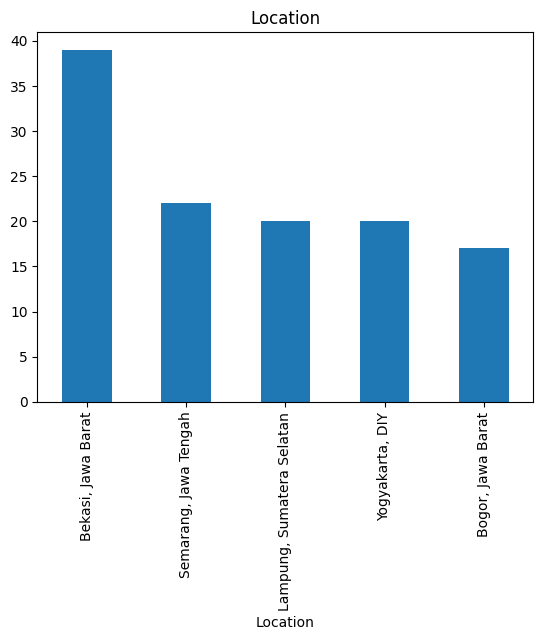

In [19]:
feature = 'Location'
count = user_df[feature].value_counts()
percent = 100*user_df[feature].value_counts(normalize=True)

top_5_count = count.head(5)
top_5_percent = percent.head(5)

df_vis = pd.DataFrame({'jumlah sampel':top_5_count, 'persentase':top_5_percent.round(1)})
print(df_vis)
top_5_count.plot(kind='bar', title=feature);

Variabel dalam dataset **user**:

- **User_Id**: Identifikasi unik untuk setiap pengguna.  
- **Location**: Kota atau daerah asal pengguna.  
- **Age**: Usia pengguna.  

Dataset **user** terdiri dari **300 data** dengan **3 variabel**, mencerminkan jumlah unik pengguna yang tercatat. Variabel **Location** memiliki **28 nilai unik**, menunjukkan beragam daerah asal pengguna. Selain itu, variabel **Age** mencakup rentang usia antara **24 hingga 40 tahun**. Sementara itu, **5 pengguna dengan jumlah rating terbanyak** berasal dari **Bekasi, Semarang, Yogyakarta, Lampung, dan Bogor**.

# Data Preparation

## Preprocessing untuk EDA

### Mengecek total user dan location
Pada tahap ini, empat dataset dibagi menjadi dua kelompok, yaitu **user** dan **location** (tempat wisata). Selanjutnya, dataset **rating_df** dan **user_df** digabungkan untuk memperoleh total jumlah pengguna, sedangkan dataset **location_df** dan **rating_df** digabungkan untuk menentukan total destinasi wisata.  

Selain itu, penggabungan dataset **user** dilakukan untuk menghitung jumlah keseluruhan pengguna yang terdaftar.  


In [20]:
# Menggabungkan seluruh userID
user_all = np.concatenate((
    rating_df['User_Id'].unique(),
    user_df['User_Id'].unique()
))

# Menghapus data yang sama kemudian mengurutkannya
user_all = np.sort(np.unique(user_all))

print('Jumlah seluruh user: ', len(user_all))

Jumlah seluruh user:  300


Jumlah total pengguna tercatat sebanyak 300 user.


Selanjutnya, dilakukan penggabungan dataset location untuk menentukan jumlah keseluruhan destinasi wisata yang ada.


In [21]:
# Menggabungkan seluruh Place
place_all = np.concatenate((
    location_df['Place_Id'].unique(),
    rating_df['Place_Id'].unique()
))

# Menghapus data yang sama kemudian mengurutkannya
place_all = np.sort(np.unique(place_all))

print('Jumlah seluruh lokasi: ', len(place_all))

Jumlah seluruh lokasi:  437


Jumlah total destinasi wisata yang tercatat dalam dataset location adalah 437 data.


### Mengecek jumlah rating
Langkah berikutnya adalah membuat variabel baru bernama **place** dengan menggabungkan data dari **rating_df** dan **location_df**. Tujuan dari penggabungan ini adalah untuk menganalisis jumlah rating berdasarkan data gabungan yang tersedia.  


In [22]:
place = pd.merge(rating_df, location_df , on='Place_Id', how='left')
place

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Budaya,Yogyakarta,75000,4.6,90.0,"{'lat': -7.7705416, 'lng': 110.4894158}",-7.770542,110.489416,NaN,179
1,1,344,2,Pantai Marina,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Bahari,Semarang,3000,4.1,NaN,"{'lat': -6.948877, 'lng': 110.3893285}",-6.948877,110.389329,NaN,344
2,1,5,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5
3,1,373,3,Museum Kereta Ambarawa,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Budaya,Semarang,10000,4.5,60.0,"{'lat': -7.264598899999997, 'lng': 110.4046017}",-7.264599,110.404602,NaN,373
4,1,101,4,Kampung Wisata Sosro Menduran,Kampung wisata Sosromenduran merupakan kampung...,Budaya,Yogyakarta,0,4.0,NaN,"{'lat': -7.792189999999999, 'lng': 110.362151}",-7.792190,110.362151,NaN,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,300,425,2,Waterpark Kenjeran Surabaya,Waterpark Kenjeran Surabaya merupakan wisata k...,Taman Hiburan,Surabaya,35000,4.1,NaN,"{'lat': -7.247796300000002, 'lng': 112.7998235}",-7.247796,112.799824,NaN,425
9996,300,64,4,Museum Sasmita Loka Ahmad Yani,Museum Sasmita Loka Ahmad Yani adalah salah sa...,Budaya,Jakarta,2000,4.7,45.0,"{'lat': -6.204630300000001, 'lng': 106.8365324}",-6.204630,106.836532,NaN,64
9997,300,311,3,The Lodge Maribaya,The Lodge Maribaya adalah salah satu tempat wi...,Cagar Alam,Bandung,25000,4.3,150.0,"{'lat': -6.829411199999999, 'lng': 107.6874666}",-6.829411,107.687467,NaN,311
9998,300,279,4,Masjid Agung Trans Studio Bandung,Masjid Agung Trans Studio Bandung (TSB) berdir...,Tempat Ibadah,Bandung,0,4.8,NaN,"{'lat': -6.925963500000001, 'lng': 107.6354278}",-6.925963,107.635428,NaN,279


In [23]:
place.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   User_Id        10000 non-null  int64  
 1   Place_Id       10000 non-null  int64  
 2   Place_Ratings  10000 non-null  int64  
 3   Place_Name     10000 non-null  object 
 4   Description    10000 non-null  object 
 5   Category       10000 non-null  object 
 6   City           10000 non-null  object 
 7   Price          10000 non-null  int64  
 8   Rating         10000 non-null  float64
 9   Time_Minutes   4628 non-null   float64
 10  Coordinate     10000 non-null  object 
 11  Lat            10000 non-null  float64
 12  Long           10000 non-null  float64
 13  Unnamed: 11    0 non-null      float64
 14  Unnamed: 12    10000 non-null  int64  
dtypes: float64(5), int64(5), object(5)
memory usage: 1.1+ MB


In [24]:
place.isnull().sum()

,0
User_Id,0
Place_Id,0
Place_Ratings,0
Place_Name,0
Description,0
Category,0
City,0
Price,0
Rating,0
Time_Minutes,5372


Dataset hasil gabungan rating_df dan location_df terdiri dari 10.000 data rating. Pada dataset ini, terdapat beberapa nilai null pada kolom time_minutes dan Unnamed: 11.


Selanjutnya, lakukan ekstraksi terhadap fitur numerik, kemudian hitung total dari fitur numerik tersebut berdasarkan Place-Id.



In [25]:
# Pilih hanya kolom numerik
numerical_data = place.select_dtypes(include='number')

# Groupby 'Place-ID' dan hitung jumlahnya
result = numerical_data.groupby(place['Place_Id']).sum()
print(result)

          User_Id  Place_Id  Place_Ratings    Price  Rating  Time_Minutes  \
Place_Id                                                                    
1            2635        18             67   360000    82.8         270.0   
2            3260        50             71        0   115.0        2250.0   
3            3718        57             48  5130000    87.4        6840.0   
4            2708        84             60   210000    94.5           0.0   
5            3008       125             88  2350000   112.5        1500.0   
...           ...       ...            ...      ...     ...           ...   
433          3110      9959             76    46000   101.2        1035.0   
434          3419     10850             60        0   115.0           0.0   
435          2656      7395             51        0    74.8         765.0   
436          3810      9592             68        0   101.2           0.0   
437          6340     16606            125   380000   182.4           0.0   

## Data Preprocessing untuk *Content Based Filtering*



### Membuat Dataframe untuk Modeling Content-Based Filtering
Langkah berikutnya adalah membuat variabel baru bernama all_place_name, yang akan berisi data dari rating_df. Variabel ini kemudian akan digabungkan dengan beberapa kolom dari location_df, yaitu Place_Id, Place_Name, Category, dan City, berdasarkan Place-Id.


In [26]:
all_place_name = rating_df
all_place_name

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4
...,...,...,...
9995,300,425,2
9996,300,64,4
9997,300,311,3
9998,300,279,4


In [27]:
# Menggabungkan all resto_rate dengan dataframe geo berdasarkan placeID
all_place_name = pd.merge(all_place_name, location_df[['Place_Id','Place_Name', 'Category', 'City']], on='Place_Id', how='left')

# Print dataframe all_resto_name
all_place_name

,User_Id,Place_Id,Place_Ratings,Place_Name,Category,City
0,1,179,3,Candi Ratu Boko,Budaya,Yogyakarta
1,1,344,2,Pantai Marina,Bahari,Semarang
2,1,5,5,Atlantis Water Adventure,Taman Hiburan,Jakarta
3,1,373,3,Museum Kereta Ambarawa,Budaya,Semarang
4,1,101,4,Kampung Wisata Sosro Menduran,Budaya,Yogyakarta
...,...,...,...,...,...,...
9995,300,425,2,Waterpark Kenjeran Surabaya,Taman Hiburan,Surabaya
9996,300,64,4,Museum Sasmita Loka Ahmad Yani,Budaya,Jakarta
9997,300,311,3,The Lodge Maribaya,Cagar Alam,Bandung
9998,300,279,4,Masjid Agung Trans Studio Bandung,Tempat Ibadah,Bandung


### Memeriksa Nilai Null
Langkah selanjutnya adalah melakukan pengecekan terhadap nilai null, kemudian menganalisis deskripsi fitur numerik. Selain itu, dilakukan pemeriksaan terhadap jumlah data unik dalam kolom Place_Id, Place_Name, dan Category.


In [28]:
all_place_name.isnull().sum()

,0
User_Id,0
Place_Id,0
Place_Ratings,0
Place_Name,0
Category,0
City,0


### Memeriksa Data Duplikat
Langkah selanjutnya adalah melakukan pengecekan terhadap nilai duplikat dalam dataset untuk memastikan integritas dan keakuratan data yang digunakan.


In [29]:
duplicate_rows = all_place_name.duplicated()

print(duplicate_rows.sum())

79


Karena terdapat data yang duplikat, langkah berikutnya adalah menghapus duplikasi tersebut untuk memastikan keakuratan dan kualitas dataset yang digunakan.


In [30]:
all_place_name = all_place_name.drop_duplicates()

### Memeriksa Deskripsi Analisis dan Jumlah Data Unik
Pada tahap ini, dilakukan analisis deskriptif terhadap dataset serta pengecekan jumlah data unik pada kolom Place_Id, Place_Name, dan Location untuk memahami distribusi dan karakteristik data yang tersedia.


In [31]:
all_place_name.describe()

,User_Id,Place_Id,Place_Ratings
count,9921.000000,9921.000000,9921.000000
mean,151.337970,219.486745,3.066929
std,86.107089,126.164097,1.380070
min,1.000000,1.000000,1.000000
25%,77.000000,109.000000,2.000000
50%,151.000000,220.000000,3.000000
75%,226.000000,329.000000,4.000000
max,300.000000,437.000000,5.000000


In [32]:
len(all_place_name['Place_Id'].unique())

437

In [33]:
len(all_place_name['Place_Name'].unique())

437

In [34]:
len(all_place_name['Category'].unique())

6

Hasilnya, data telah dipastikan bersih dari **nilai null** dan memiliki **437 nilai unik** pada kolom **Place_Id** serta **Place_Name**. Selain itu, terdapat **6 nilai unik** pada **Category**. Dataset ini juga mencakup **300 pengguna** dengan rentang **rating** antara **1 hingga 5**.  


### Memeriksa Kembali Data untuk Content-Based Filtering
Pada tahap ini, dilakukan pengecekan ulang terhadap data yang telah melalui proses preprocessing sebelumnya. Setelah itu, data akan diurutkan berdasarkan Place_Id untuk memastikan struktur yang sesuai dengan kebutuhan analisis lebih lanjut.


In [35]:
all_place_name = all_place_name.sort_values('Place_Id', ascending=True)
all_place_name

,User_Id,Place_Id,Place_Ratings,Place_Name,Category,City
8426,254,1,5,Monumen Nasional,Budaya,Jakarta
1145,36,1,4,Monumen Nasional,Budaya,Jakarta
3417,105,1,5,Monumen Nasional,Budaya,Jakarta
1203,38,1,2,Monumen Nasional,Budaya,Jakarta
7552,227,1,5,Monumen Nasional,Budaya,Jakarta
...,...,...,...,...,...,...
2043,63,437,4,Gereja Perawan Maria Tak Berdosa Surabaya,Tempat Ibadah,Surabaya
9888,297,437,4,Gereja Perawan Maria Tak Berdosa Surabaya,Tempat Ibadah,Surabaya
4222,129,437,4,Gereja Perawan Maria Tak Berdosa Surabaya,Tempat Ibadah,Surabaya
47,2,437,4,Gereja Perawan Maria Tak Berdosa Surabaya,Tempat Ibadah,Surabaya


### Memeriksa Nilai Unik pada Kolom Category
Langkah berikutnya adalah melakukan pengecekan terhadap nilai unik dalam kolom Category untuk memastikan keberagaman dan keberadaan berbagai kategori tempat wisata yang tersedia dalam dataset.


In [36]:
all_place_name['Category'].unique()

array(['Budaya', 'Taman Hiburan', 'Cagar Alam', 'Bahari',
       'Pusat Perbelanjaan', 'Tempat Ibadah'], dtype=object)

Data dalam dataset memiliki berbagai kategori tempat wisata, yaitu Budaya, Taman Hiburan, Cagar Alam, Pusat Perbelanjaan, dan Tempat Ibadah.


### Menghapus Duplikasi pada Place_Id
Langkah berikutnya adalah membuat variabel preparation yang akan berisi data dari all_place_name. Setelah itu, data diurutkan berdasarkan Place_Id untuk memastikan struktur yang lebih terorganisir dan siap untuk analisis lebih lanjut.


In [37]:
preparation = all_place_name
preparation.sort_values('Place_Id')

,User_Id,Place_Id,Place_Ratings,Place_Name,Category,City
8426,254,1,5,Monumen Nasional,Budaya,Jakarta
3862,118,1,4,Monumen Nasional,Budaya,Jakarta
2804,86,1,4,Monumen Nasional,Budaya,Jakarta
8785,265,1,4,Monumen Nasional,Budaya,Jakarta
5348,162,1,5,Monumen Nasional,Budaya,Jakarta
...,...,...,...,...,...,...
1986,61,437,5,Gereja Perawan Maria Tak Berdosa Surabaya,Tempat Ibadah,Surabaya
4222,129,437,4,Gereja Perawan Maria Tak Berdosa Surabaya,Tempat Ibadah,Surabaya
47,2,437,4,Gereja Perawan Maria Tak Berdosa Surabaya,Tempat Ibadah,Surabaya
42,2,437,5,Gereja Perawan Maria Tak Berdosa Surabaya,Tempat Ibadah,Surabaya


Selanjutnya, hapus nilai duplikat pada kolom Place_Id, karena hanya data yang bersifat unik yang akan digunakan dalam analisis.


In [38]:
preparation = preparation.drop_duplicates('Place_Id')
preparation

,User_Id,Place_Id,Place_Ratings,Place_Name,Category,City
8426,254,1,5,Monumen Nasional,Budaya,Jakarta
1837,57,2,4,Kota Tua,Budaya,Jakarta
6156,185,3,1,Dunia Fantasi,Taman Hiburan,Jakarta
127,5,4,3,Taman Mini Indonesia Indah (TMII),Taman Hiburan,Jakarta
7924,238,5,2,Atlantis Water Adventure,Taman Hiburan,Jakarta
...,...,...,...,...,...,...
1096,34,433,4,Museum Mpu Tantular,Budaya,Surabaya
123,5,434,4,Taman Bungkul,Taman Hiburan,Surabaya
6013,181,435,2,Taman Air Mancur Menari Kenjeran,Taman Hiburan,Surabaya
5674,171,436,4,Taman Flora Bratang Surabaya,Taman Hiburan,Surabaya


Membuat Data Dictionary untuk Modeling
Langkah berikutnya adalah melakukan konversi data series menjadi list dengan menggunakan fungsi tolist() untuk mempermudah pemrosesan dan analisis lebih lanjut dalam proses modeling.


In [39]:
# Mengonversi data series ‘placeID’ menjadi dalam bentuk list
place_id = preparation['Place_Id'].tolist()

# Mengonversi data series ‘Name’ menjadi dalam bentuk list
place_name = preparation['Place_Name'].tolist()

# Mengonversi data series ‘Rcuisine’ menjadi dalam bentuk list
place_cat = preparation['Category'].tolist()

print(len(place_id))
print(len(place_name))
print(len(place_cat))

437
437
437


Selanjutnya, buat data dictionary yang berisi informasi mengenai place_id, place_name, dan place_cat (kategori tempat wisata). Setelah itu, lakukan pengecekan untuk memastikan data telah dibuat dengan benar dan sesuai dengan kebutuhan analisis.


In [40]:
place_new = pd.DataFrame({
    'id': place_id,
    'name': place_name,
    'category': place_cat
})

place_new

,id,name,category
0,1,Monumen Nasional,Budaya
1,2,Kota Tua,Budaya
2,3,Dunia Fantasi,Taman Hiburan
3,4,Taman Mini Indonesia Indah (TMII),Taman Hiburan
4,5,Atlantis Water Adventure,Taman Hiburan
...,...,...,...
432,433,Museum Mpu Tantular,Budaya
433,434,Taman Bungkul,Taman Hiburan
434,435,Taman Air Mancur Menari Kenjeran,Taman Hiburan
435,436,Taman Flora Bratang Surabaya,Taman Hiburan


### Ekstraksi TF-IDF
Ekstraksi TF-IDF (Term Frequency-Inverse Document Frequency) adalah teknik yang digunakan untuk mengubah teks menjadi representasi numerik dengan mempertimbangkan seberapa sering suatu kata muncul dalam suatu dokumen dibandingkan dengan keseluruhan dokumen.


Pada langkah ini, buat variabel data yang berisi data place_new.

In [41]:
data = place_new
data.head()

,id,name,category
0,1,Monumen Nasional,Budaya
1,2,Kota Tua,Budaya
2,3,Dunia Fantasi,Taman Hiburan
3,4,Taman Mini Indonesia Indah (TMII),Taman Hiburan
4,5,Atlantis Water Adventure,Taman Hiburan


Panggil fungsi **TfidfVectorizer** dan lakukan **fit** terhadap kolom **Category**.  


In [42]:
# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()

# Melakukan perhitungan idf pada data cuisine
tf.fit(data['category'])

# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names_out()

array(['alam', 'bahari', 'budaya', 'cagar', 'hiburan', 'ibadah',
       'perbelanjaan', 'pusat', 'taman', 'tempat'], dtype=object)

Lakukan **fit-transform** untuk mengubah data kategori menjadi vektor TF-IDF, kemudian periksa ukuran matriks hasil transformasi.

In [43]:
tfidf_matrix = tf.fit_transform(data['category'])

# Melihat ukuran matrix tfidf
tfidf_matrix.shape

(437, 10)

Konversi data ke dalam bentuk **matriks** menggunakan fungsi **`todense()`** untuk mendapatkan representasi numerik dari TF-IDF.  

In [44]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0.        , 0.        , 1.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.70710678,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.70710678,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.70710678,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.70710678]])

Tampilkan hasil dari **TF-IDF**, di mana setiap kategori memiliki bobot tersendiri.

In [46]:
pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=data.name
).sample(10, axis=1).sample(10, axis=0)

,cagar,budaya,alam,perbelanjaan,bahari,pusat,taman,ibadah,hiburan,tempat
name,,,,,,,,,,
Museum Nike Ardilla,0.000000,1.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
Monumen Palagan Ambarawa,0.000000,1.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
Taman Pandanaran,0.000000,0.0,0.000000,0.0,0.0,0.0,0.707107,0.000000,0.707107,0.000000
Setu Babakan,0.000000,1.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
NuArt Sculpture Park,0.000000,0.0,0.000000,0.0,0.0,0.0,0.707107,0.000000,0.707107,0.000000
Gereja Perawan Maria Tak Berdosa Surabaya,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.707107,0.000000,0.707107
Taman Hutan Raya Ir. H. Djuanda,0.707107,0.0,0.707107,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
Kampung Korea Bandung,0.000000,1.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
Taman Lalu Lintas Ade Irma Suryani Nasution,0.000000,0.0,0.000000,0.0,0.0,0.0,0.707107,0.000000,0.707107,0.000000


Sebagai contoh, **Museum Nike Ardilla** memiliki nilai **1** pada kategori **Budaya**, yang menandakan bahwa museum tersebut termasuk dalam kategori **Budaya**, dan konsep ini berlaku untuk destinasi lainnya.

## Data Preprocessing untuk Collaborative Filtering

### Membuat Dataframe untuk Modeling Collaborative Filtering
Langkah pertama dalam proses ini adalah membuat variabel df yang berisi dataset rating_df, yang akan digunakan sebagai dasar dalam penerapan metode Collaborative Filtering.


In [47]:
df = rating_df
df

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4
...,...,...,...
9995,300,425,2
9996,300,64,4
9997,300,311,3
9998,300,279,4


Selanjutnya, lakukan persiapan data dengan menyandikan (encoding) fitur User_Id ke dalam indeks berbentuk integer untuk memastikan data dapat digunakan dalam proses pemodelan lebih lanjut.


In [48]:
# Mengubah userID menjadi list tanpa nilai yang sama
user_ids = df['User_Id'].unique().tolist()
print('list userID: ', user_ids)

# Melakukan encoding userID
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded userID : ', user_to_user_encoded)

# Melakukan proses encoding angka ke ke userID
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke userID: ', user_encoded_to_user)

list userID:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219

Selanjutnya, lakukan persiapan data dengan menyandikan (encoding) fitur Place_Id ke dalam indeks berbentuk integer, sehingga data dapat digunakan secara optimal dalam proses pemodelan lebih lanjut.


In [49]:
# Mengubah placeID menjadi list tanpa nilai yang sama
place_ids = df['Place_Id'].unique().tolist()

# Melakukan proses encoding placeID
place_to_place_encoded = {x: i for i, x in enumerate(place_ids)}

# Melakukan proses encoding angka ke placeID
place_encoded_to_place = {i: x for i, x in enumerate(place_ids)}

Langkah berikutnya adalah memetakan User_Id dan Place_Id ke dalam dataframe yang sesuai, sehingga setiap pengguna dan destinasi wisata memiliki relasi yang jelas dalam dataset.


In [50]:
# Mapping userID ke dataframe user
df['user'] = df['User_Id'].map(user_to_user_encoded)

# Mapping placeID ke dataframe place
df['place'] = df['Place_Id'].map(place_to_place_encoded)

Langkah berikutnya adalah melakukan **pemeriksaan** terhadap beberapa aspek dalam data, seperti:  

- **Jumlah pengguna** dalam dataset.  
- **Jumlah destinasi wisata** yang tersedia.  
- **Mengonversi nilai rating** ke tipe data **float** untuk memastikan kompatibilitas dengan analisis lebih lanjut.  


In [51]:
# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)
print(num_users)

# Mendapatkan jumlah place
num_place = len(place_encoded_to_place)
print(num_place)

# Mengubah rating menjadi nilai float
df['Place_Ratings'] = df['Place_Ratings'].values.astype(np.float32)

# Nilai minimum rating
min_rating = min(df['Place_Ratings'])

# Nilai maksimal rating
max_rating = max(df['Place_Ratings'])

print('Number of User: {}, Number of place: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_place, min_rating, max_rating
))

300
437
Number of User: 300, Number of place: 437, Min Rating: 1.0, Max Rating: 5.0


Dataframe menunjukkan bahwa terdapat 300 pengguna, 437 destinasi wisata, serta nilai rating yang berkisar antara 1.0 hingga 5.0.


### Mengacak Data
Langkah berikutnya adalah mengacak data untuk memastikan distribusinya menjadi random, sehingga model dapat belajar dari berbagai pola tanpa bias terhadap urutan asli data.


In [52]:
df = df.sample(frac=1, random_state=42)
df

,User_Id,Place_Id,Place_Ratings,user,place
6252,188,207,3.0,187,262
4684,142,268,2.0,141,83
1731,54,103,3.0,53,10
4742,144,119,3.0,143,141
4521,138,288,5.0,137,283
...,...,...,...,...,...
5734,173,402,5.0,172,175
5191,157,85,4.0,156,33
5390,163,18,3.0,162,52
860,28,416,4.0,27,187


Karena kolom User_Id belum mengalami pengacakan, langkah berikutnya adalah mengacak kolom user terlebih dahulu untuk memastikan distribusi data menjadi lebih acak dan tidak terurut secara default.


In [53]:
df['user'] = np.random.permutation(df['user'].values)
df

,User_Id,Place_Id,Place_Ratings,user,place
6252,188,207,3.0,222,262
4684,142,268,2.0,225,83
1731,54,103,3.0,6,10
4742,144,119,3.0,255,141
4521,138,288,5.0,39,283
...,...,...,...,...,...
5734,173,402,5.0,159,175
5191,157,85,4.0,107,33
5390,163,18,3.0,158,52
860,28,416,4.0,39,187


### Membagi Data Train dan Data Validation
Langkah berikutnya adalah membagi data train dan data validasi dengan komposisi 80:20 dari data yang telah melalui tahap data preparation.
Sebelum melakukan pembagian, lakukan pemetaan (mapping) data user dan place agar setiap nilai pengguna dan tempat wisata direpresentasikan sebagai satu value. Selain itu, ubah rating ke dalam skala 0 sampai 1 untuk mempermudah proses training model.


In [54]:
# Membuat variabel x untuk mencocokkan data user dan resto menjadi satu value
x = df[['user', 'place']].values

# Membuat variabel y untuk membuat rating dari hasil
y = df['Place_Ratings'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[222 262]
 [225  83]
 [  6  10]
 ...
 [158  52]
 [ 39 187]
 [ 31   6]] [0.5  0.25 0.5  ... 0.5  0.75 0.25]


# Modeling and Result
Proses modeling yang dilakukan pada proyek ini adalah dengan membuat algoritma machine learning, yaitu content based filtering dan collabrative filtering.

### 1. Model Development dengan Content Based Filtering

Langkah pertama adalah menghitung derajat kesamaan antar tempat wisata dengan menggunakan teknik Cosine Similarity. Metode ini digunakan untuk mengukur tingkat kemiripan antar destinasi wisata berdasarkan fitur yang tersedia.


In [55]:
# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1., 1., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 1., 1., 0.],
       ...,
       [0., 0., 1., ..., 1., 1., 0.],
       [0., 0., 1., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

Selanjutnya, periksa matriks kesamaan antar tempat wisata dengan menampilkan nama tempat wisata dalam 5 sampel kolom (axis = 1) dan 10 sampel baris (axis = 0).
Langkah ini membantu memahami bagaimana setiap destinasi wisata berhubungan berdasarkan derajat kesamaannya dalam dataset.


In [56]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['name'], columns=data['name'])
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix pada setiap lokasi
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (437, 437)


name,Air Terjun Kali Pancur,Klenteng Sanggar Agung,The World Landmarks - Merapi Park Yogyakarta,Monumen Batik Yogyakarta,Pantai Ngobaran
name,,,,,
Sungai Palayangan,1.0,0.0,0.0,0.0,0.0
Kampung Cina,0.0,1.0,0.0,1.0,0.0
Taman Srigunting,0.0,0.0,1.0,0.0,0.0
Kawasan Kuliner BSM,0.0,0.0,0.0,0.0,0.0
Pasar Taman Puring,0.0,0.0,0.0,0.0,0.0
Klenteng Sanggar Agung,0.0,1.0,0.0,1.0,0.0
Gunung Manglayang,1.0,0.0,0.0,0.0,0.0
Wisata Eling Bening,1.0,0.0,0.0,0.0,0.0
Pantai Nguluran,0.0,0.0,0.0,0.0,1.0


Dalam contoh tersebut, terlihat bahwa Kampung Cina memiliki nilai 1 dengan Kelnteng Sanggar Agung dan Monumen Batik Yogyakarta, yang menunjukkan bahwa ketiganya termasuk dalam kategori yang sama.


#### Modeling Content-Based Filtering
Langkah selanjutnya adalah membuat fungsi rekomendasi tempat wisata berdasarkan data yang telah dipersiapkan dalam proses data preparation. Dalam fungsi ini, sistem akan memberikan 5 rekomendasi tempat wisata berdasarkan nama destinasi yang diinputkan.


In [57]:
def location_recommendations(nama, similarity_data=cosine_sim_df, items=data[['name', 'category']], k=5):
    """
    Rekomendasi Resto berdasarkan kemiripan dataframe

    Parameter:
    ---
    nama : tipe data string (str)
                Nama Tempat Wisata (index kemiripan dataframe)
    similarity_data : tipe data pd.DataFrame (object)
                      Kesamaan dataframe, simetrik, dengan resto sebagai
                      indeks dan kolom
    items : tipe data pd.DataFrame (object)
            Mengandung kedua nama dan fitur lainnya yang digunakan untuk mendefinisikan kemiripan
    k : tipe data integer (int)
        Banyaknya jumlah rekomendasi yang diberikan
    ---


    Pada index ini akan diambil k dengan nilai similarity terbesar
    pada index matrix yang diberikan (i).
    """


    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,nama].to_numpy().argpartition(
        range(-1, -k, -1))

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop nama_resto agar nama resto yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(nama, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

Selanjutnya, masukkan data yang ingin dicari rekomendasinya, sehingga sistem dapat memberikan hasil rekomendasi tempat wisata berdasarkan analisis Content-Based Filtering.


In [58]:
data[data.name.eq('Kebun Binatang Ragunan')]

,id,name,category
6,7,Kebun Binatang Ragunan,Cagar Alam


Selanjutnya, gunakan fungsi yang telah dibuat sebelumnya untuk mencari rekomendasi tempat wisata.


In [59]:
location_recommendations('Kebun Binatang Ragunan')

,name,category
0,Tebing Karaton,Cagar Alam
1,Situ Cileunca,Cagar Alam
2,Lereng Anteng Panoramic Coffee Place,Cagar Alam
3,Sunrise Point Cukul,Cagar Alam
4,The Lodge Maribaya,Cagar Alam


Hasilnya menunjukkan bahwa sistem merekomendasikan destinasi wisata dengan kategori yang sama, sehingga pengguna mendapatkan pilihan tempat yang relevan sesuai dengan preferensinya.


### 2. Model Development dengan Collaborative Filtering

Buat class RecommenderNet dengan menggunakan Keras Model class untuk mengembangkan sistem rekomendasi berbasis Collaborative Filtering.


In [62]:
class RecommenderNet(tf.keras.Model):

  # Insialisasi fungsi
  def __init__(self, num_users, num_place, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_place = num_place
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-4)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.place_embedding = layers.Embedding( # layer embeddings place
        num_place,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.place_bias = layers.Embedding(num_place, 1) # layer embedding place bias

    self.dropout = layers.Dropout(0.3)

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_vector = self.dropout(user_vector)
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    place_vector = self.place_embedding(inputs[:, 1]) # memanggil layer embedding 3
    place_vector = self.dropout(place_vector)
    place_bias = self.place_bias(inputs[:, 1]) # memanggil layer embedding 4

    dot_user_place = tf.tensordot(user_vector, place_vector, 2)

    x = dot_user_place + user_bias + place_bias

    return tf.nn.sigmoid(x) # activation sigmoid

Setelah itu, lakukan compile terhadap model dengan mengatur:
- Loss function menggunakan binary crossentropy
- Optimizer menggunakan Adam
- Metrik evaluasi menggunakan RMSE (Root Mean Square Error)


In [63]:
model = RecommenderNet(num_users, num_place, 20) # inisialisasi model

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

Selanjutnya, lakukan proses training pada model dengan data yang telah dipersiapkan.

In [64]:
# Memulai training
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 100,
    validation_data = (x_val, y_val)
)

Epoch 1/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.6959 - root_mean_squared_error: 0.3459 - val_loss: 0.6956 - val_root_mean_squared_error: 0.3455
Epoch 2/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6906 - root_mean_squared_error: 0.3422 - val_loss: 0.6952 - val_root_mean_squared_error: 0.3452
Epoch 3/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.6856 - root_mean_squared_error: 0.3406 - val_loss: 0.6957 - val_root_mean_squared_error: 0.3454
Epoch 4/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.6811 - root_mean_squared_error: 0.3342 - val_loss: 0.6965 - val_root_mean_squared_error: 0.3458
Epoch 5/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.6791 - root_mean_squared_error: 0.3321 - val_loss: 0.6975 - val_root_mean_squared_error: 0.3463
Epoch 6/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.6762 - root_mean_squared_error: 0.3319 - val_loss: 0.6986 - val_root_mean_squared_error: 0.3468
Epoch 7/100
1000/1000 ━━━━━━━━━━━━

Selanjutnya, lakukan visualisasi proses training dengan menggunakan Matplotlib untuk memplot metrik evaluasi, sehingga dapat melihat bagaimana performa model selama proses pelatihan dan memahami tren yang terjadi.


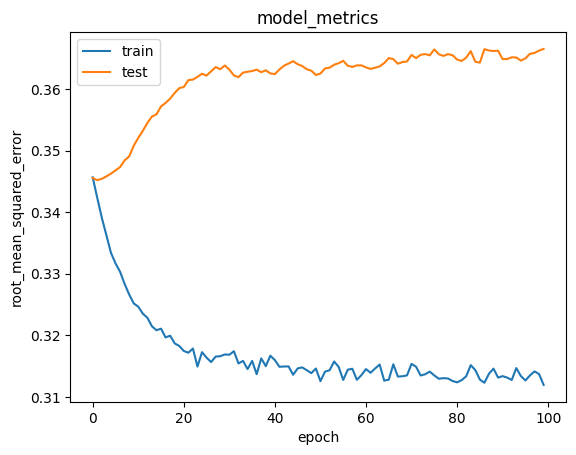

In [65]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Berdasarkan grafik tersebut, didapatkan bahwa RMSE dari data train adalah 0.3144 dan RMSE dari data validation adalah 0.3661, dimana sistem yang dikembangkan sudah baik untuk model Collaborative Filtering ini.

Sebelum menjalankan prediksi sistem rekomendasi, terlebih dahulu buat variabel place_not_visited yang berisi daftar destinasi yang belum dikunjungi oleh pengguna. Daftar ini akan digunakan sebagai dasar dalam memberikan rekomendasi tempat wisata yang sesuai.


In [66]:
place_df = place_new
df = pd.read_csv('tourism_rating.csv')

# Mengambil sample user
user_id = df['User_Id'].sample(1).iloc[0]
place_visited_by_user = df[df['User_Id'] == user_id]

# Operator bitwise (~), bisa diketahui di sini https://docs.python.org/3/reference/expressions.html
place_not_visited = place_df[~place_df['id'].isin(place_visited_by_user['Place_Id'].values)]['id']
place_not_visited = list(
    set(place_not_visited)
    .intersection(set(place_to_place_encoded.keys()))
)

place_not_visited = [[place_to_place_encoded.get(x)] for x in place_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_place_array = np.hstack(
    ([[user_encoder]] * len(place_not_visited), place_not_visited)
)

Langkah berikutnya adalah melakukan prediksi untuk mendapatkan 10 rekomendasi tempat wisata berdasarkan data yang telah diproses sebelumnya. Sistem akan menganalisis pola preferensi pengguna dan memberikan rekomendasi yang paling sesuai.


In [67]:
ratings = model.predict(user_place_array).flatten()

top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_place_ids = [
    place_encoded_to_place.get(place_not_visited[x][0]) for x in top_ratings_indices
]

print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('place with high ratings from user')
print('----' * 8)

top_place_user = (
    place_visited_by_user.sort_values(
        by = 'Place_Ratings',
        ascending=False
    )
    .head(5)['Place_Ratings'].values
)

place_df_rows = place_df[place_df['id'].isin(top_place_user)]
for row in place_df_rows.itertuples():
    print(row.name, ':', row.category)

print('----' * 8)
print('Top 10 place recommendation')
print('----' * 8)

recommended_place = place_df[place_df['id'].isin(recommended_place_ids)]
for row in recommended_place.itertuples():
    print(row.name, ':', row.category)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step
Showing recommendations for users: 113
place with high ratings from user
--------------------------------
Atlantis Water Adventure : Taman Hiburan
--------------------------------
Top 10 place recommendation
--------------------------------
Pantai Baron : Bahari
Selasar Sunaryo Art Space : Taman Hiburan
Teras Cikapundung BBWS : Taman Hiburan
Wisata Batu Kuda : Cagar Alam
Ciwangun Indah Camp Official : Cagar Alam
Curug Batu Templek : Cagar Alam
Masjid Agung Trans Studio Bandung : Tempat Ibadah
Curug Cilengkrang : Cagar Alam
Sanghyang Heuleut : Cagar Alam
Taman Ekspresi Dan Perpustakaan : Taman Hiburan


# Kesimpulan

Proyek ini berhasil mengembangkan **sistem rekomendasi tempat wisata** menggunakan dua pendekatan utama: *Content-Based Filtering* dan *Collaborative Filtering*.  

Selama proses pengerjaan, berbagai tahapan telah dilakukan, termasuk **Data Understanding, Data Preparation, Modeling**, serta **Evaluasi Model** untuk memastikan sistem bekerja secara optimal.  

Pada pendekatan **Content-Based Filtering**, hasil evaluasi menunjukkan performa yang sangat baik, sehingga sistem berhasil memberikan rekomendasi yang akurat berdasarkan informasi **deskripsi, kategori, dan fasilitas destinasi wisata**.  

Sementara itu, dalam **Collaborative Filtering**, hasil evaluasi juga cukup baik, sehingga sistem rekomendasi dapat bekerja secara efisien dengan memanfaatkan **rating destinasi wisata** untuk memberikan rekomendasi yang relevan.  

Namun, proyek ini masih memiliki keterbatasan karena ukuran dataset yang terbatas. Hal ini menyebabkan kemungkinan model memberikan rekomendasi yang kurang sesuai dengan input yang diberikan pengguna.  
